## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Importing and Merging Data

In [63]:
# Importing Pandas and NumPy
# Importing matplotlib and seaborn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [3]:
#Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [4]:
#Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Let's understand the structure of our dataframe

In [5]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [7]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Data Preparation

In [8]:
# Converting Yes to 1 and No to 0
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

### Dummy Variable Creation

In [9]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

C:\Users\shesmeg\AppData\Local\Temp\ipykernel_25372\3615927451.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['MultipleLines_No phone service'],1)
C:\Users\shesmeg\AppData\Local\Temp\ipykernel_25372\3615927451.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1= os.drop(['OnlineSecurity_No internet service'],1)
C:\Users\shesmeg\AppData\Local\Temp\ipykernel_25372\3615927451.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1 =ob.drop(['OnlineBackup_No internet service'],1)
C:\Users\shesmeg\AppData\Local\Temp\ipykernel_25372\3615927451.py:42: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dp1 = dp.drop(['DevicePr

### Dropping the repeated variables

In [10]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

C:\Users\shesmeg\AppData\Local\Temp\ipykernel_25372\398896987.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',


In [11]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [12]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

### Checking for Outliers

In [13]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [14]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in your data. The numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

In [15]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [16]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [17]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [18]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Feature Standardisation

In [19]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [20]:
normalized_df=(df-df.mean())/df.std()

In [21]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)

C:\Users\shesmeg\AppData\Local\Temp\ipykernel_25372\2973793263.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)


In [22]:
telecom = pd.concat([telecom,normalized_df],axis=1)

In [23]:
telecom

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,1,0,1,0,1,0,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,1,1,0,0,1,0,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.157934,0.319145,-0.872033


### Checking the Churn Rate

In [24]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100

In [25]:
churn

26.578498293515356

We have almost 27% churn rate

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

In [28]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [29]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Feature Selection Using RFE

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

C:\Users\shesmeg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[False  True False False False  True  True False  True False False  True
 False  True  True  True False False False False False False False False
  True False  True  True  True  True]
[ 5  1  3 18  4  1  1 11  1 12 17  1 16  1  1  1  7  6 15  9 10  2  8 14
  1 13  1  1  1  1]


In [31]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [32]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression()

### Making Predictions

In [33]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])

In [34]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [35]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [36]:
# Let's see the head
y_pred_1.head()

,1
0,0.503122
1,0.372716
2,0.005868
3,0.642876
4,0.007084


In [37]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [38]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [39]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [40]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [41]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [42]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,942,0.503122
1,1,3730,0.372716
2,0,1761,0.005868
3,1,2283,0.642876
4,0,1872,0.007084


In [43]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [44]:
# Let's see the head
y_pred_final.head()

,Churn,CustID,Churn_Prob,predicted
0,0,942,0.503122,1
1,1,3730,0.372716,0
2,0,1761,0.005868,0
3,1,2283,0.642876,1
4,0,1872,0.007084,0


### Model Evaluation

In [45]:
from sklearn import metrics

In [46]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1360,  168],
       [ 256,  326]], dtype=int64)

In [48]:
# Predicted     not_churn    churn
# Actual
# not_churn        1360      168
# churn            256       326  

In [49]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.7990521327014218

In [50]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [51]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8415841584158416

In [52]:
# Let us calculate specificity
TN / float(TN+FP)

0.659919028340081

In [53]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.340080971659919


In [54]:
# positive predictive value 
print (TP / float(TP+FP))

0.8900523560209425


In [55]:
# Negative predictive value
print (TN / float(TN+ FN))

0.5601374570446735


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [64]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

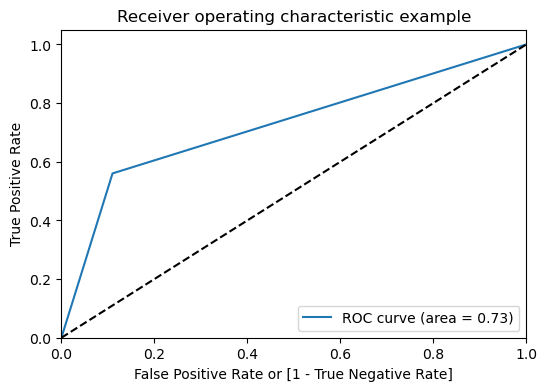

(array([0.        , 0.10994764, 1.        ]),
 array([0.        , 0.56013746, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [65]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [66]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Churn,CustID,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,942,0.503122,1,1,1,1,1,1,1,0,0,0,0
1,1,3730,0.372716,0,1,1,1,1,0,0,0,0,0,0
2,0,1761,0.005868,0,1,0,0,0,0,0,0,0,0,0
3,1,2283,0.642876,1,1,1,1,1,1,1,1,0,0,0
4,0,1872,0.007084,0,1,0,0,0,0,0,0,0,0,0


In [67]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  0.000000  1.000000
0.1   0.1  0.608531  0.479058  0.948454
0.2   0.2  0.696209  0.645288  0.829897
0.3   0.3  0.751659  0.752618  0.749141
0.4   0.4  0.782938  0.826571  0.668385
0.5   0.5  0.799052  0.890052  0.560137
0.6   0.6  0.798578  0.943717  0.417526
0.7   0.7  0.757346  0.981675  0.168385
0.8   0.8  0.725118  1.000000  0.003436
0.9   0.9  0.724171  1.000000  0.000000


<AxesSubplot:xlabel='prob'>

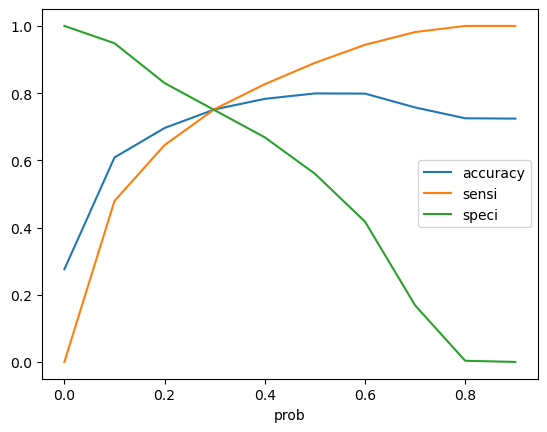

In [68]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [69]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [70]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,942,0.503122,1,1,1,1,1,1,1,0,0,0,0,1
1,1,3730,0.372716,0,1,1,1,1,0,0,0,0,0,0,1
2,0,1761,0.005868,0,1,0,0,0,0,0,0,0,0,0,0
3,1,2283,0.642876,1,1,1,1,1,1,1,1,0,0,0,1
4,0,1872,0.007084,0,1,0,0,0,0,0,0,0,0,0,0


In [71]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7516587677725118

In [72]:
metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

array([[1150,  378],
       [ 146,  436]], dtype=int64)